In [1]:
%pylab inline
a, b, N = -10,10,2**9
x_grid = linspace(a,b,N)
delta_x = x_grid[1]-x_grid[0]

k0 = -5 # -5 for harmonic -18 for tunnel effect
k_grid = linspace(k0,-k0,N)
delta_k = k_grid[1]-k_grid[0]


Populating the interactive namespace from numpy and matplotlib


In [9]:
%%time 
isqrt2pi = 1/sqrt(2*pi)

FT = zeros(shape=(N,N),dtype=complex)
for m in range(len(k_grid)):
    for n in range(len(x_grid)):
        FT[m,n] = delta_x*isqrt2pi*exp(-1j * k_grid[m] * x_grid[n])

iFT = zeros(shape=(N,N),dtype=complex)
for m in range(len(k_grid)):
    for n in range(len(x_grid)):
        iFT[n,m] = delta_k*isqrt2pi*exp(+1j * k_grid[m] * x_grid[n])

CPU times: user 1.21 s, sys: 28 ms, total: 1.24 s
Wall time: 1.19 s


In [12]:
np.dot(iFT,FT)

(0.0624134641511431+0j)

In [3]:


def ft(phix):
    #return dot(FT,phix)
    return isqrt2pi * array([ delta_x * sum(phix * exp(-1j * k * x_grid)) for k in k_grid])

def ift(phik):
    #return dot(iFT,phik)
    return isqrt2pi * array([ delta_k * sum(phik * exp( 1j * x * k_grid)) for x in x_grid])

def norm_x(psi): return sum(delta_x*abs(psi)**2)
def norm_k(psi): return sum(delta_k*abs(psi)**2)



1.0
0.999999999128
5.62967481111e-10


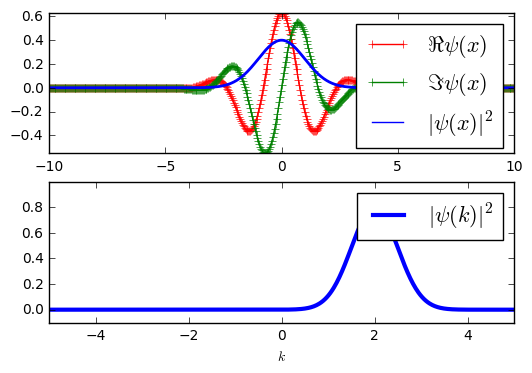

In [4]:


def gaussian_wave(x_,x0_=0,sigma=1,k0_=0):
    return sqrt(isqrt2pi/sigma) * exp(-( (x_-x0_)/(2*sigma) )**2 + 1j*k0_*x_)

def plotwf(psi):
    fig = figure()
    ax1 = fig.add_subplot(211)
    ax1.plot(x_grid, psi.real, 'r+-',label=r'$\Re\psi(x)$')  
    ax1.plot(x_grid, psi.imag, 'g+-',label=r'$\Im\psi(x)$')  
    ax1.plot(x_grid, abs(psi)**2, 'b-',label=r'$|\psi(x)|^2$')
    line_x, = ax1.plot(x_grid, abs(psi)**2, 'b')
    line_x.set_linewidth(2)
    y_min = min(min(psi.real),min(psi.imag))
    y_max = max(max(psi.real),max(psi.imag),max(abs(psi)**2))
    ax1.axis([x_grid[0],x_grid[-1],y_min,y_max])
    ax1.set_xlabel('$x$')
    ax1.legend(prop=dict(size=16))
    ax2 = fig.add_subplot(212)
    line_k, = ax2.plot(k_grid, abs(ft(psi))**2, 'b', label=r'$|\psi(k)|^2$')
    line_k.set_linewidth(3)
    ax2.set_xlabel('$k$')
    ax2.legend(prop=dict(size=16))
    ax2.axis([k_grid[0],k_grid[-1],-.1,1])
    
gwp = gaussian_wave(x_grid,x0_=0,sigma=1,k0_=2)
print(norm_x(gwp))
# checking Parseval-Plancherel
igwp= ft(gwp)
print(norm_k(igwp))
# checking fourier back
print( norm_x(ift(igwp)-gwp) )

#plot(x_grid,abs(gwp)**2,'+-',x_grid,gwp.real,'r-')
#plot(k_grid,abs(igwp)**2,'+-')
plotwf(gwp)
show()



In [10]:
iFT = [delta_k*isqrt2pi*exp(+1j * k_grid[m] * x_grid[n]) for m in range(N) for n in range(N)] 